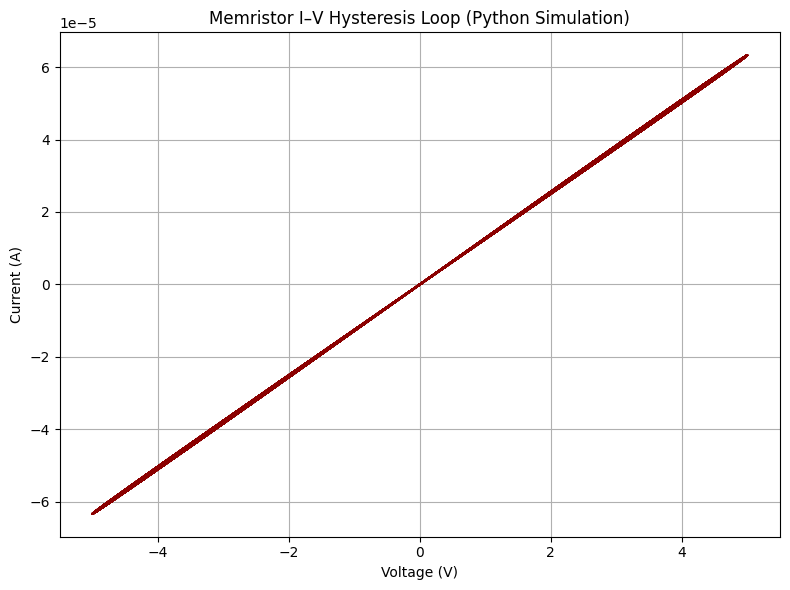

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# === Memristor Parameters ===
Ron = 1e3         # Low resistance
Roff = 100e3      # High resistance
D = 10e-9         # Device length
uv = 10e-14       # Mobility
p = 10            # Window function power
Rinit = 80e3      # Initial resistance

# === Simulation Parameters ===
dt = 1e-5         # Time step
T = 0.02          # Total time (20ms)
t = np.arange(0, T, dt)
v_in = 5 * np.sin(2 * np.pi * 1000 * t)  # 1kHz sine wave, 5V peak

# === Initialize Arrays ===
x = np.zeros_like(t)
x[0] = (Roff - Rinit) / (Roff - Ron)  # Normalize initial resistance
i_out = np.zeros_like(t)
R_mem = np.zeros_like(t)

# === Biolek window function ===
def f(x, polarity, p):
    return 1 - (2*x - 1)**(2*p)

# === Simulation Loop ===
for n in range(1, len(t)):
    R_mem[n] = Ron * x[n-1] + Roff * (1 - x[n-1])
    i_out[n] = v_in[n] / R_mem[n]
    polarity = np.sign(i_out[n])
    dx = dt * (uv * Ron / D**2) * i_out[n] * f(x[n-1], polarity, p)
    x[n] = np.clip(x[n-1] + dx, 0, 1)

# Final values
R_mem[-1] = Ron * x[-1] + Roff * (1 - x[-1])
i_out[-1] = v_in[-1] / R_mem[-1]

# === Plot I-V Curve ===
plt.figure(figsize=(8, 6))
plt.plot(v_in, i_out, color='darkred')
plt.title('Memristor I–V Hysteresis Loop (Python Simulation)')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
from google.colab import files
files.download("memristor_iv_loop.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
plt.savefig("memristor_iv_loop.png")


<Figure size 640x480 with 0 Axes>

In [1]:
!pip install numpy matplotlib
